In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **K-means + Decision Tree**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


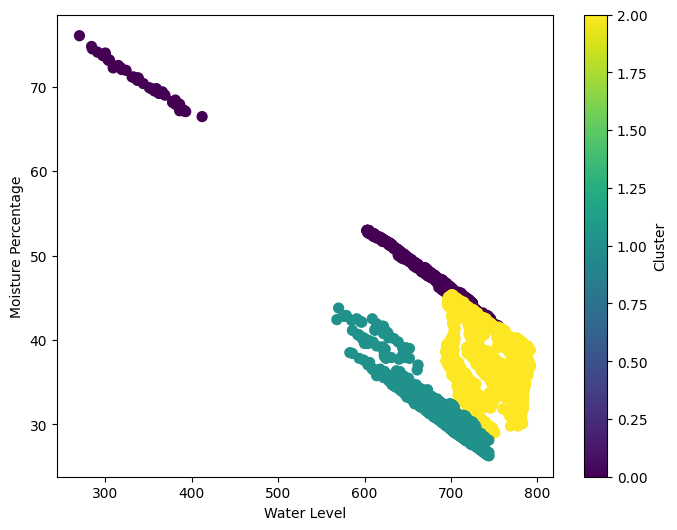

In [ ]:
# K-means Code:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# Loading the Farm dataset:
data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_data.xlsx')

# Selecting the relevant columns for clustering:
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]

# Standardising the features (important for K-means):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialising K-means with 3 clusters (No irrigation, Immediate irrigation, Irrigation in near future):
kmeans = KMeans(n_clusters=3, random_state=42)

# Fiting K-means to the standardized data:
kmeans.fit(X_scaled)

# Geting cluster labels:
cluster_labels = kmeans.labels_

# Adding cluster labels to the original dataset:
data['Cluster'] = cluster_labels

# Visualising the clusters (pairwise scatter plots):
plt.figure(figsize=(8, 6))
plt.scatter(data['Water Level'], data['Moisture Percentage'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Water Level')
plt.ylabel('Moisture Percentage')
plt.colorbar(label='Cluster')
plt.show()

# Save the updated dataset to a new CSV file
data.to_csv('/content/drive/MyDrive/Research Intern/paddy-field_data_clustered.csv', index=False)

# # Download the updated CSV file
# files.download('paddy_field_data_clustered.csv')

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       352
           2       1.00      1.00      1.00       715

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



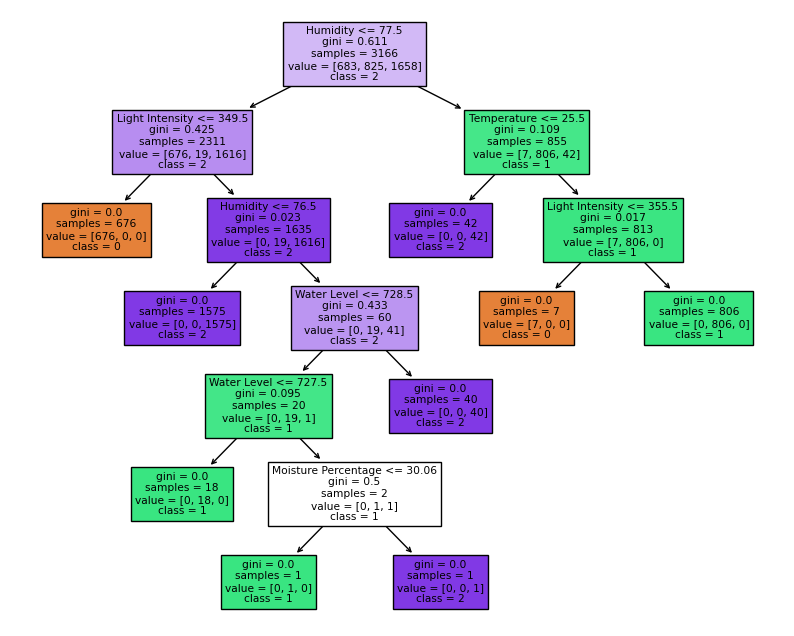

In [ ]:
# Decision Tree (Gini-Index) using dataset from K-means:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Research Intern/paddy-field_data_clustered.csv')

# Separate features (X) and target variable (y)
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]
y = data['Cluster']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also visualize the Decision Tree if you want
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
plt.show()


# **SMOTE + K-means + Decision Tree**

In [ ]:
# SMOTE:

import pandas as pd
import numpy as np

# Load your existing dataset from an Excel file
original_data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_data.xlsx')

# Separate features (X)
X = original_data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]

# Define the number of synthetic samples you want to generate
num_synthetic_samples = 15000  # Adjust as needed

# Generate synthetic data by randomly sampling from the existing data
synthetic_data = pd.DataFrame(columns=X.columns)
for _ in range(num_synthetic_samples):
    synthetic_sample = X.sample(n=1, replace=True).reset_index(drop=True)
    synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)

# Append synthetic data to the original dataset
augmented_data = pd.concat([original_data, synthetic_data], ignore_index=True)

# Save the augmented dataset to a new Excel file
augmented_data.to_excel('/content/drive/MyDrive/Research Intern/paddy-field_data_synthetic.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


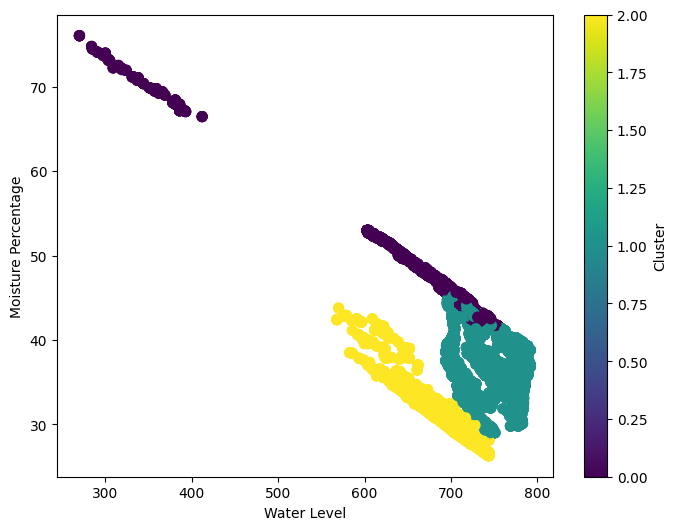

In [ ]:
# K-means Code:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# Loading the Farm dataset:
data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_data_synthetic.xlsx')

# Selecting the relevant columns for clustering:
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]

# Standardising the features (important for K-means):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialising K-means with 3 clusters (No irrigation, Immediate irrigation, Irrigation in near future):
kmeans = KMeans(n_clusters=3, random_state=42)

# Fiting K-means to the standardized data:
kmeans.fit(X_scaled)

# Geting cluster labels:
cluster_labels = kmeans.labels_

# Adding cluster labels to the original dataset:
data['Cluster'] = cluster_labels

# Visualising the clusters (pairwise scatter plots):
plt.figure(figsize=(8, 6))
plt.scatter(data['Water Level'], data['Moisture Percentage'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Water Level')
plt.ylabel('Moisture Percentage')
plt.colorbar(label='Cluster')
plt.show()

# Save the updated dataset to a new CSV file
data.to_csv('/content/drive/MyDrive/Research Intern/paddy-field_data_synthetic_clustered.csv', index=False)

# # Download the updated CSV file
# files.download('paddy_field_data_clustered.csv')

Accuracy: 0.999487879822465

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1224
           1       1.00      1.00      1.00      3102
           2       1.00      1.00      1.00      1532

    accuracy                           1.00      5858
   macro avg       1.00      1.00      1.00      5858
weighted avg       1.00      1.00      1.00      5858



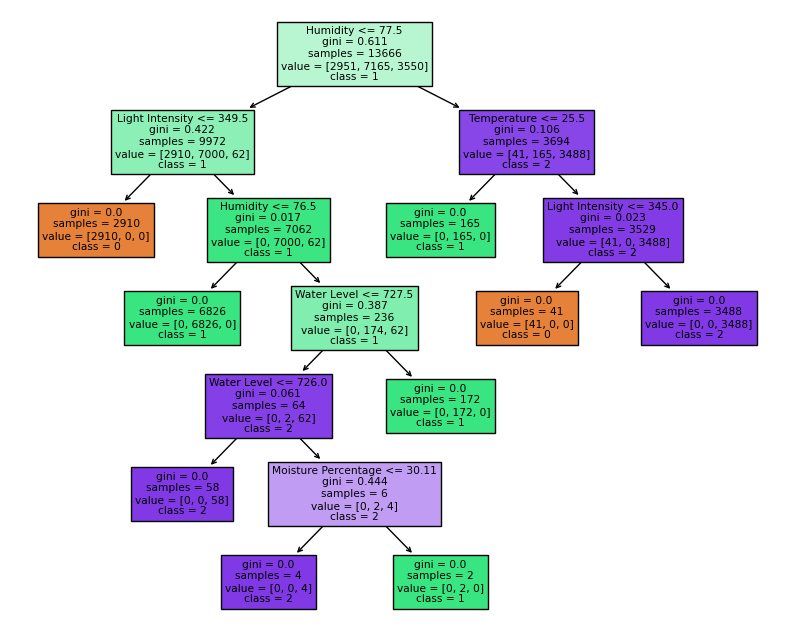

In [ ]:
# Decision Tree (Gini-Index) using dataset from K-means:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Research Intern/paddy-field_data_synthetic_clustered.csv')

# Separate features (X) and target variable (y)
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]
y = data['Cluster']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also visualize the Decision Tree if you want
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
plt.show()


#**Data Augmentation + SMOTE + Randomization + K-means + Decision Tree**

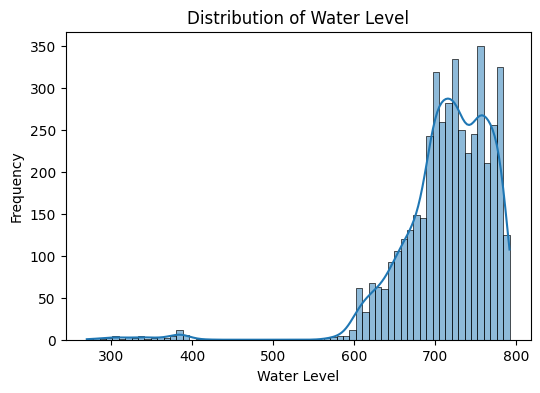

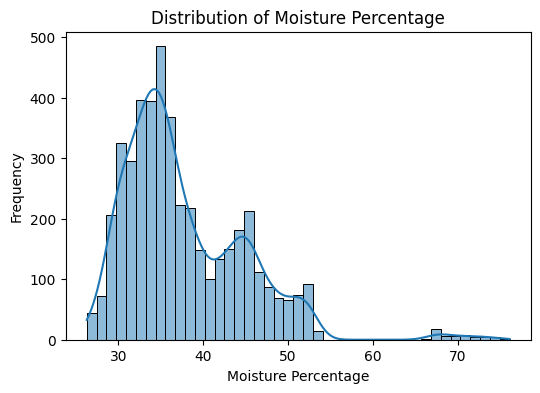

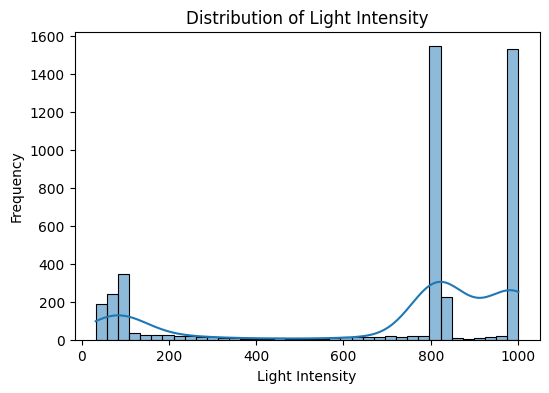

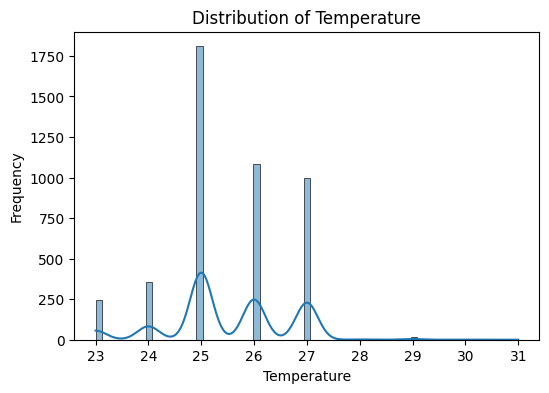

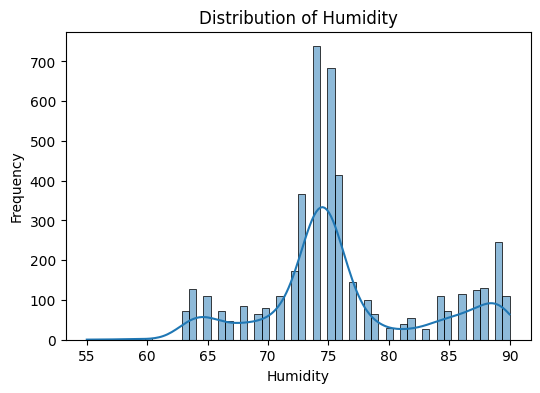

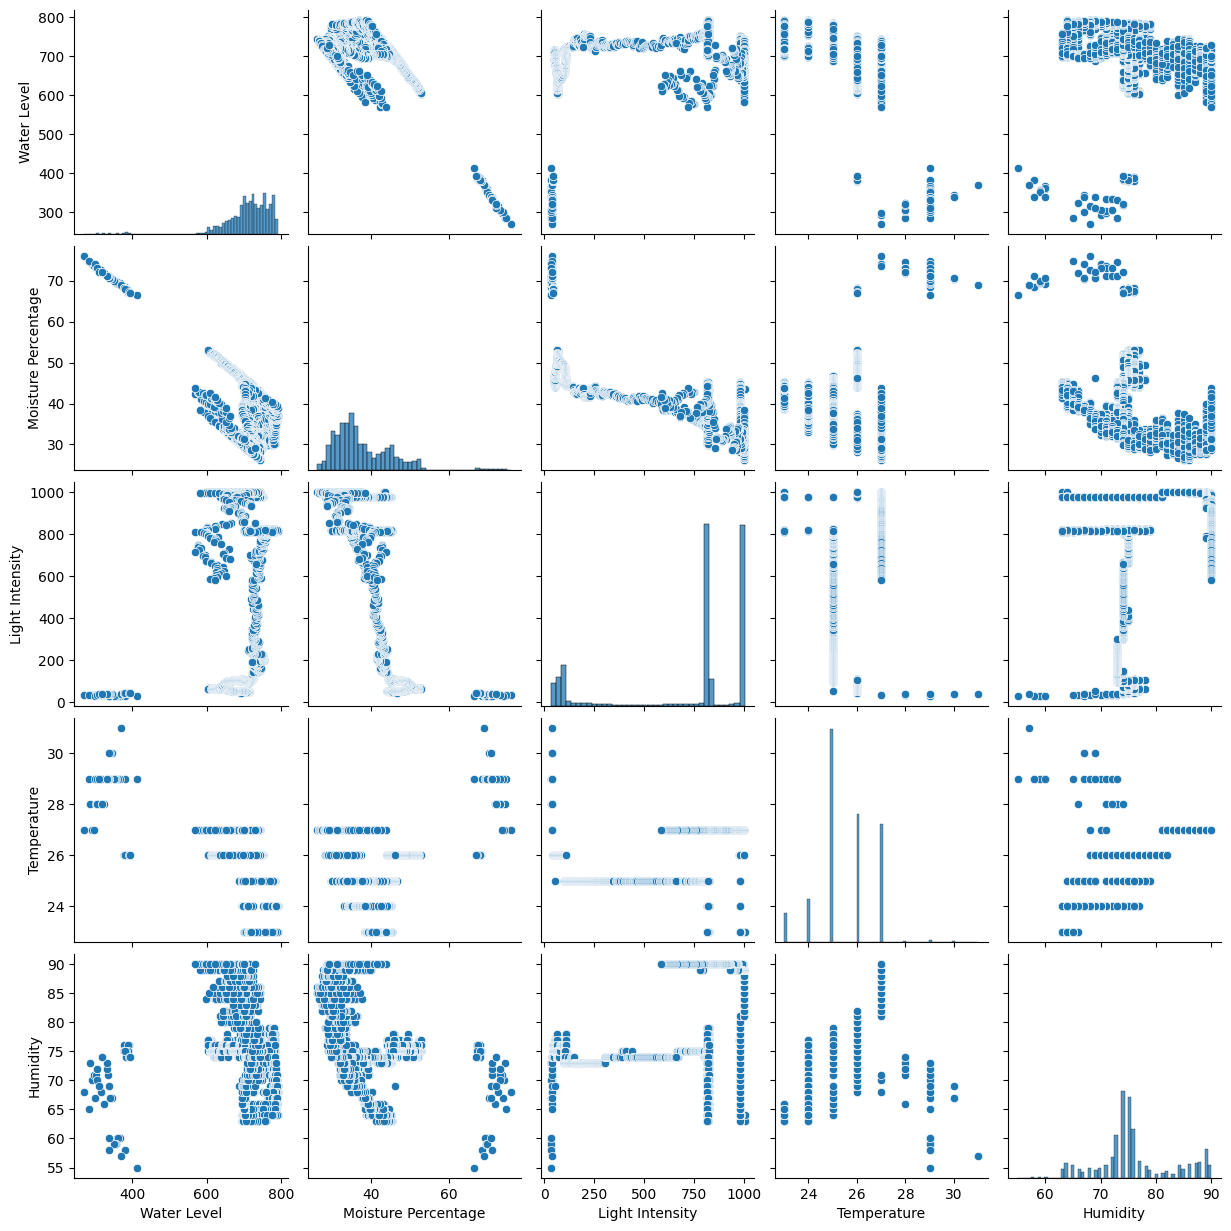

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load original dataset
original_data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_data.xlsx')

# Plot histograms/density plots for each feature
for column in original_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(original_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot for pairwise relationships
sns.pairplot(original_data)
plt.show()


In [ ]:
# Augmented data

import pandas as pd
import numpy as np

# Load the dataset from Excel file
file_path = '/content/drive/MyDrive/Research Intern/paddy-field_data.xlsx'
original_data = pd.read_excel(file_path)

# Define data augmentation function
def augment_data(data, num_augmented_samples=1000):
    augmented_data = []
    for _ in range(num_augmented_samples):
        # Generate random values within specified ranges for each feature
        augmented_row = {
            'Water Level': np.random.randint(300, 801),  # Integer values between 300 and 800
            'Moisture Percentage': round(np.random.uniform(30, 45), 2),  # Up to 2 decimal places
            'Light Intensity': np.random.randint(36, 501),  # Integer values between 36 and 500
            'Temperature': np.random.randint(24, 30),  # Integer values between 24 and 28
            'Humidity': np.random.randint(65, 91)  # Integer values between 65 and 90
        }
        augmented_data.append(augmented_row)
    return pd.DataFrame(augmented_data)

# Augment the original dataset
augmented_df = augment_data(original_data, num_augmented_samples=1000)

# Concatenate the original and augmented data
final_data = pd.concat([original_data, augmented_df], ignore_index=True)

# Display the entire dataset
print("Entire Dataset:")
print(final_data)

# Save the augmented data to a new Excel file
output_file_path = '/content/drive/MyDrive/Research Intern/paddy-field_augmented_data.xlsx'
final_data.to_excel(output_file_path, index=False)

# Print a message indicating that the file has been saved
print("\nAugmented dataset saved to:", output_file_path)


Entire Dataset:
      Water Level  Moisture Percentage  Light Intensity  Temperature  Humidity
0             270                76.05               36           27        68
1             291                74.10               36           27        70
2             297                73.70               36           27        71
3             285                74.49               35           28        73
4             303                73.22               36           28        71
...           ...                  ...              ...          ...       ...
5519          384                33.34              146           28        86
5520          470                35.34              131           25        73
5521          398                40.81              108           27        86
5522          446                34.26              375           27        69
5523          387                44.71              200           27        84

[5524 rows x 5 columns]

Augmented 

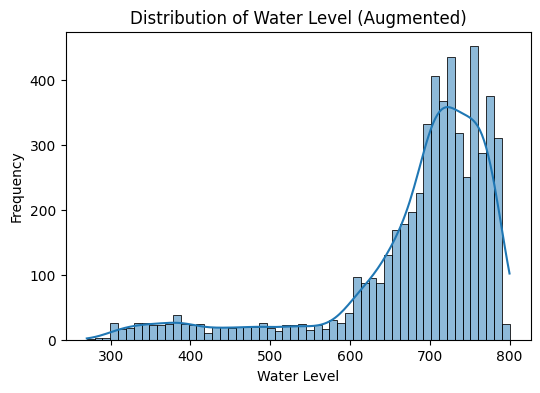

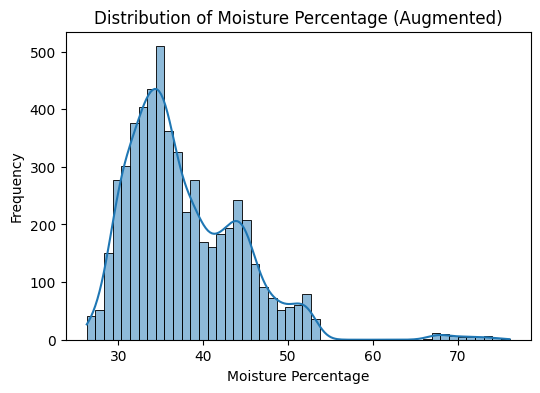

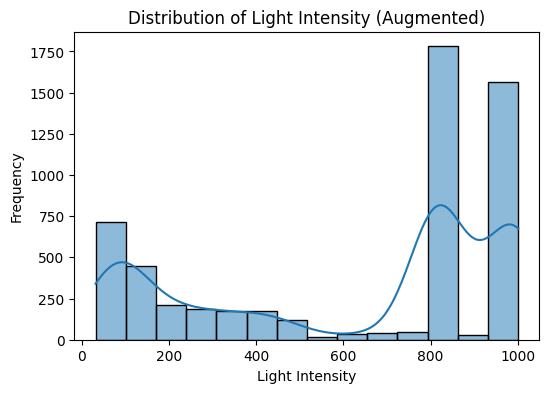

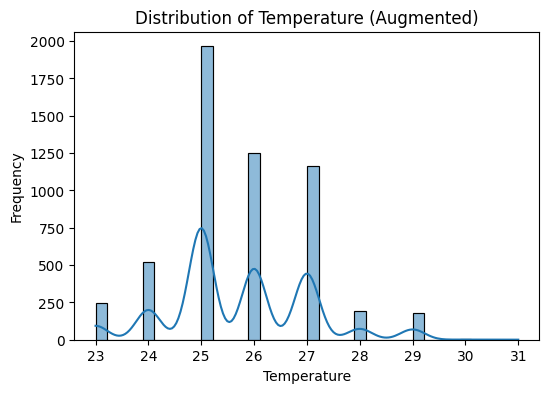

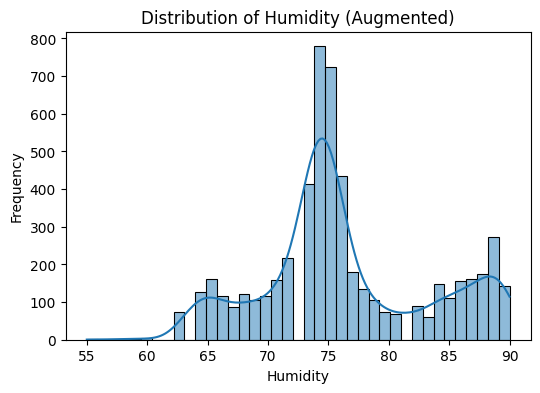

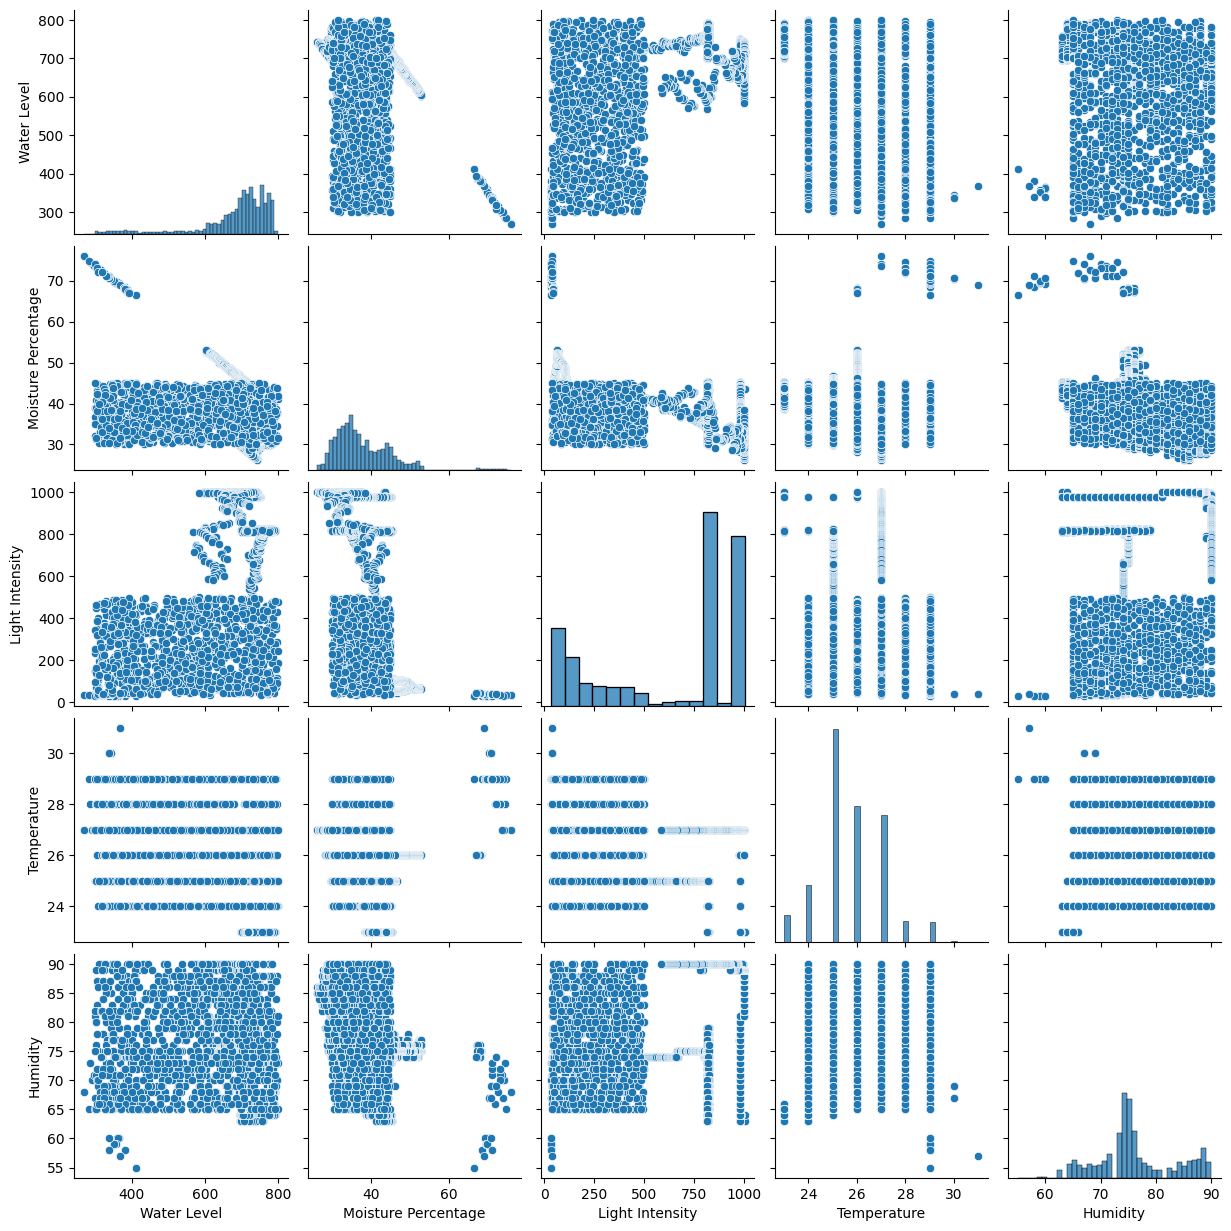

In [ ]:
# Load augmented dataset
augmented_data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_augmented_data.xlsx')

# Plot histograms/density plots for each feature in the augmented dataset
for column in augmented_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(augmented_data[column], kde=True)
    plt.title(f'Distribution of {column} (Augmented)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot for pairwise relationships in the augmented dataset
sns.pairplot(augmented_data)
plt.show()


In [ ]:
-# SMOTE After augmentation:

import pandas as pd
import pandas as pd

# Load your existing dataset from an Excel file
original_data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_augmented_data.xlsx')

# Separate features (X)
X = original_data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]

# Define the number of synthetic samples you want to generate
num_synthetic_samples = 5000  # Adjust as needed

# Generate synthetic data by randomly sampling from the existing data
synthetic_data = pd.DataFrame(columns=X.columns)
for _ in range(num_synthetic_samples):
    synthetic_sample = X.sample(n=1, replace=True).reset_index(drop=True)
    synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)  # Use pd.concat

# Append synthetic data to the original dataset
augmented_data = pd.concat([original_data, synthetic_data], ignore_index=True)

# Save the augmented dataset to a new Excel file
augmented_data.to_excel('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_data.xlsx', index=False)


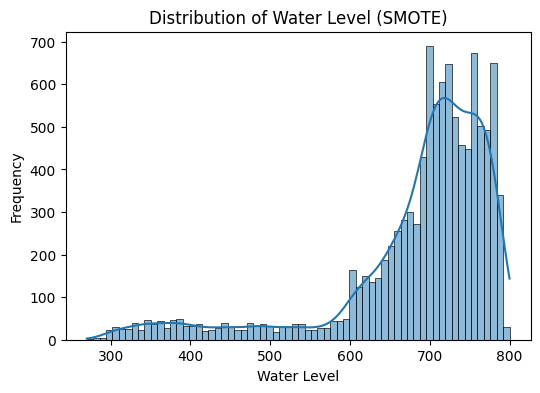

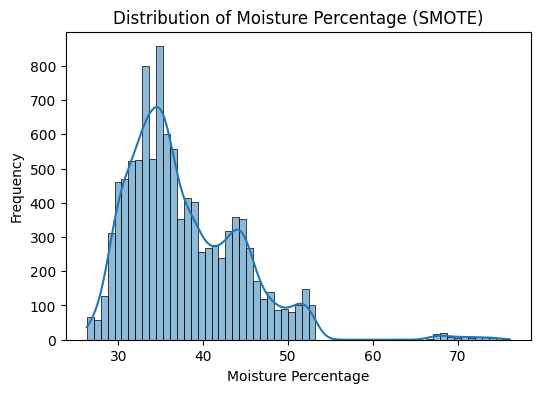

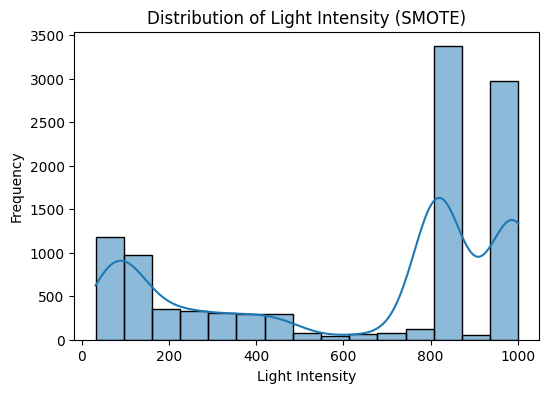

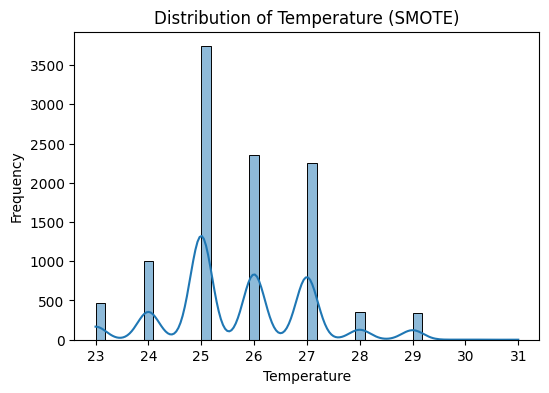

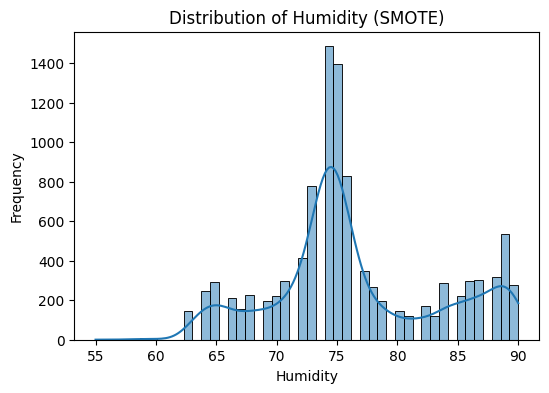

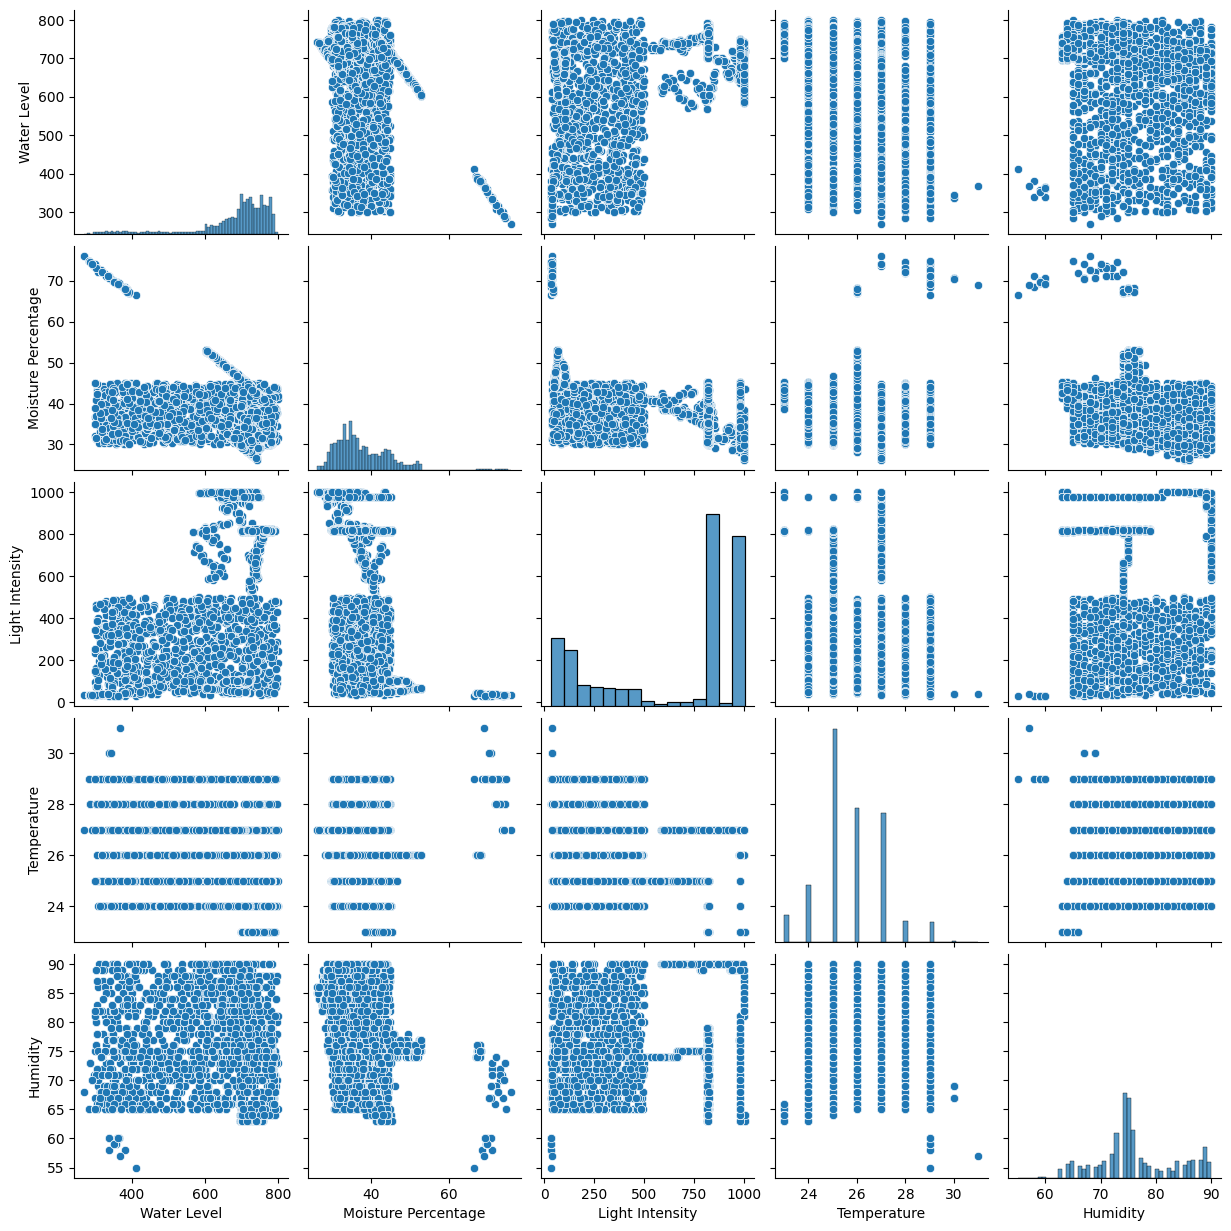

In [ ]:
from imblearn.over_sampling import SMOTE

# Load augmented dataset
smote_augmented_data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_data.xlsx')

# Plot histograms/density plots for each feature in the SMOTE-generated dataset
for column in smote_augmented_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(smote_augmented_data[column], kde=True)
    plt.title(f'Distribution of {column} (SMOTE)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot for pairwise relationships in the SMOTE-generated dataset
sns.pairplot(smote_augmented_data)
plt.show()


In [ ]:
# Shuffling of augmented-synthetic data:

import pandas as pd

# Load the dataset from Excel file
file_path = '/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_data.xlsx'
dataset = pd.read_excel(file_path)

# Shuffle the dataset randomly
shuffled_dataset = dataset.sample(frac=1).reset_index(drop=True)

# Save the shuffled dataset to a new Excel file
shuffled_file_path = '/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data.xlsx'
shuffled_dataset.to_excel(shuffled_file_path, index=False)

# Print a message indicating that the shuffled dataset has been saved
print("Shuffled dataset saved to:", shuffled_file_path)


Shuffled dataset saved to: /content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data.xlsx


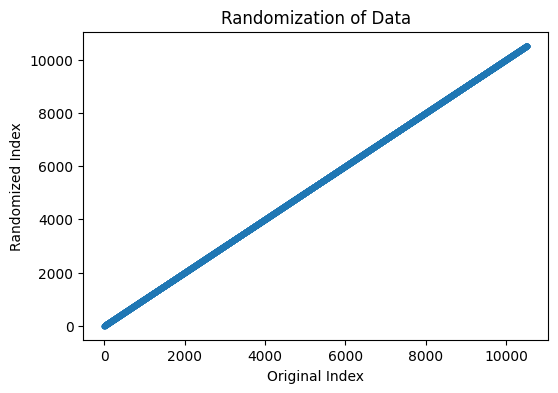

In [ ]:
# Load augmented dataset
randomized_smote_augmented_data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_data.xlsx')

# Plot to show the randomization process
plt.figure(figsize=(6, 4))
plt.scatter(range(len(randomized_smote_augmented_data)), randomized_smote_augmented_data.index, marker='.')
plt.title('Randomization of Data')
plt.xlabel('Original Index')
plt.ylabel('Randomized Index')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


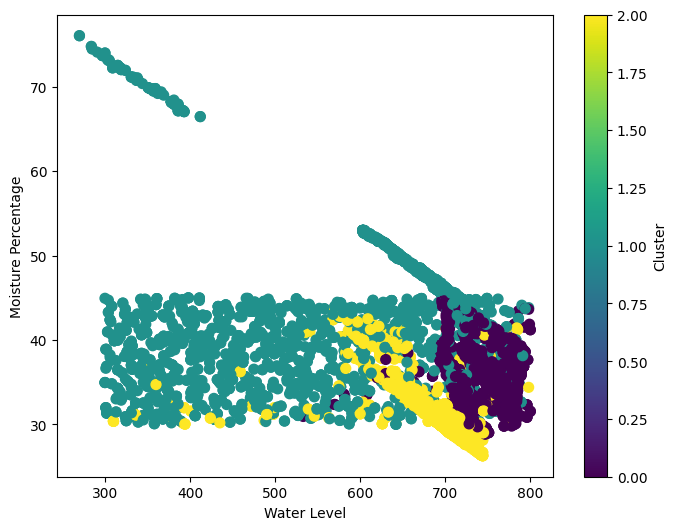

In [ ]:
# K-means Code:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# Loading the Farm dataset:
data = pd.read_excel('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data.xlsx')

# Selecting the relevant columns for clustering:
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]

# Standardising the features (important for K-means):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialising K-means with 3 clusters (No irrigation, Immediate irrigation, Irrigation in near future):
kmeans = KMeans(n_clusters=3, random_state=42)

# Fiting K-means to the standardized data:
kmeans.fit(X_scaled)

# Geting cluster labels:
cluster_labels = kmeans.labels_

# Adding cluster labels to the original dataset:
data['Cluster'] = cluster_labels

# Visualising the clusters (pairwise scatter plots):
plt.figure(figsize=(8, 6))
plt.scatter(data['Water Level'], data['Moisture Percentage'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Water Level')
plt.ylabel('Moisture Percentage')
plt.colorbar(label='Cluster')
plt.show()

# Seting pandas options to display all columns and rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Displaying the data with the additional cluster column:
# print(data)

# Save the updated dataset to a new CSV file
data.to_csv('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data_clustered.csv', index=False)

# # Download the updated CSV file
# files.download('paddy_field_data_clustered.csv')

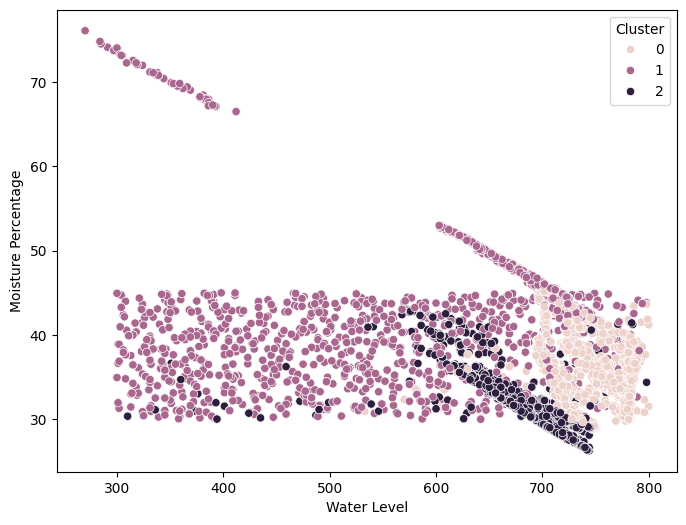

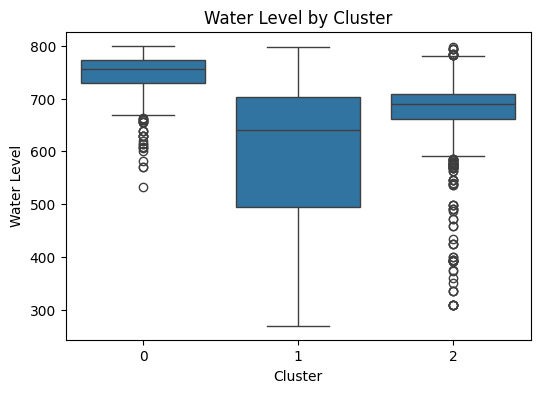

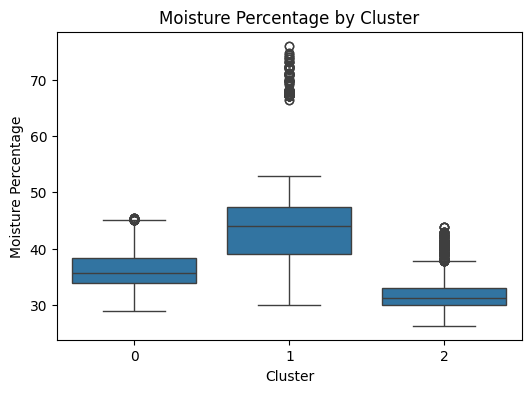

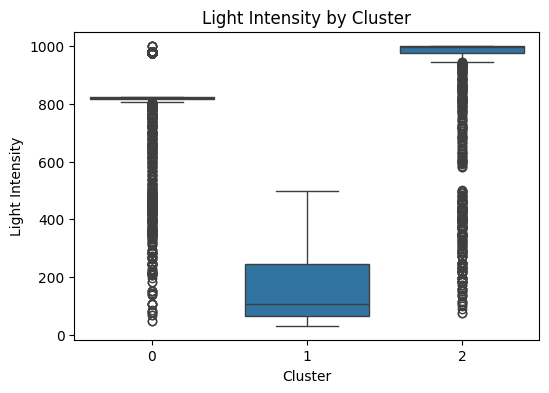

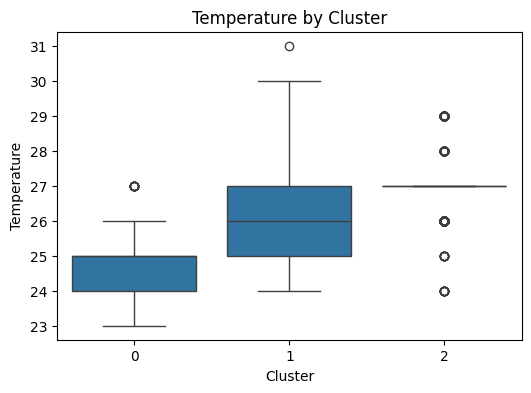

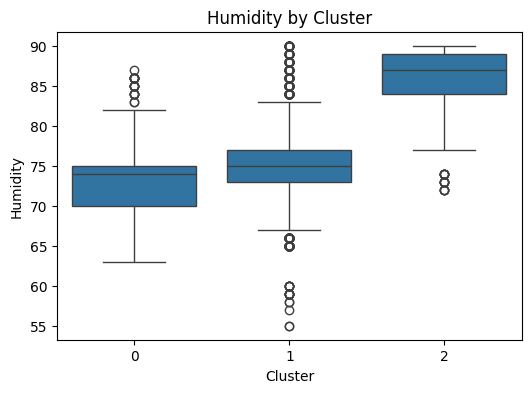

In [ ]:
from sklearn.cluster import KMeans

# Load augmented dataset
clustered_randomized_smote_augmented_data = pd.read_csv('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data_clustered.csv')

# Plot scatter plot of data points colored by cluster assignment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Water Level', y='Moisture Percentage', hue='Cluster', data=clustered_randomized_smote_augmented_data)
plt.xlabel('Water Level')
plt.ylabel('Moisture Percentage')
plt.show()

# Boxplot or violin plot for each feature colored by cluster
for column in clustered_randomized_smote_augmented_data.columns[:-1]:  # Exclude the last column (Cluster)
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=column, data=clustered_randomized_smote_augmented_data)
    plt.title(f'{column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()


Accuracy: 0.9914489311163895

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       941
           1       0.98      0.99      0.99       674
           2       0.99      0.99      0.99       490

    accuracy                           0.99      2105
   macro avg       0.99      0.99      0.99      2105
weighted avg       0.99      0.99      0.99      2105



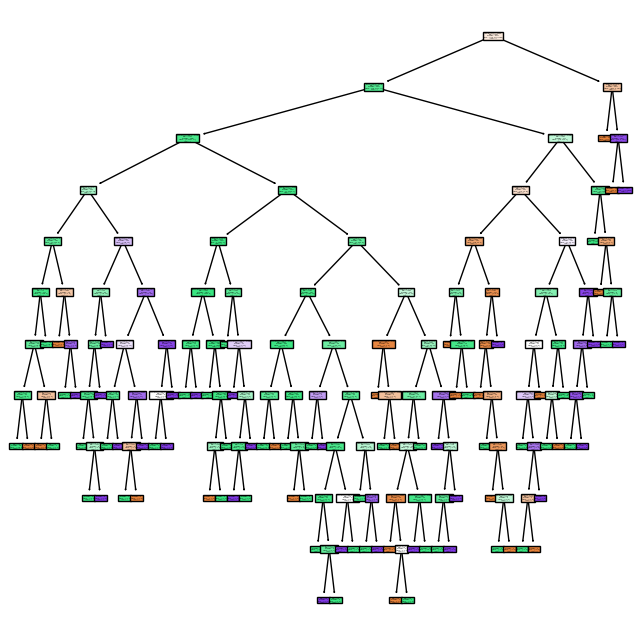

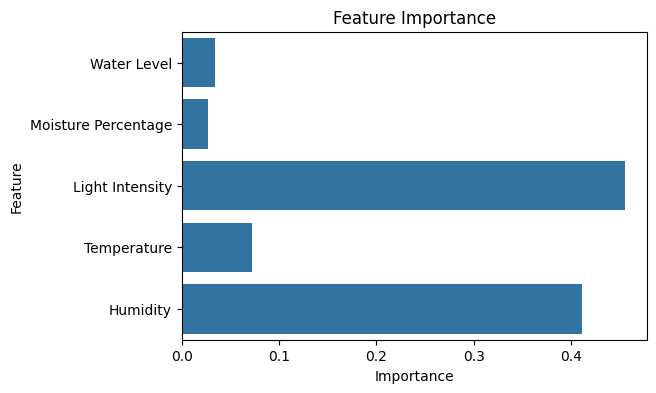

In [ ]:
# Decision Tree (Gini-Index) using dataset from K-means:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data_clustered.csv')

# Separate features (X) and target variable (y)
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]
y = data['Cluster']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(8, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
plt.show()

# Feature importance plot
plt.figure(figsize=(6, 4))
sns.barplot(x=decision_tree.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# You can also visualize the Decision Tree if you want
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
# plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
# plt.show()


Accuracy: 0.9923990498812352

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       941
           1       0.98      0.99      0.99       674
           2       1.00      0.99      0.99       490

    accuracy                           0.99      2105
   macro avg       0.99      0.99      0.99      2105
weighted avg       0.99      0.99      0.99      2105



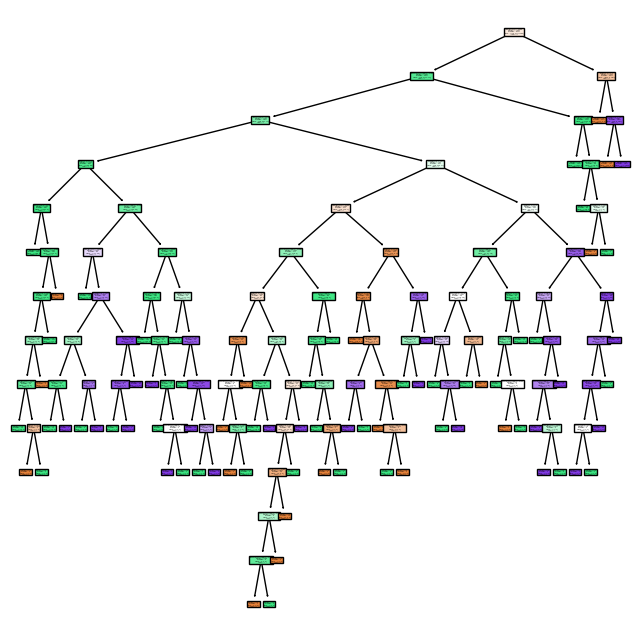

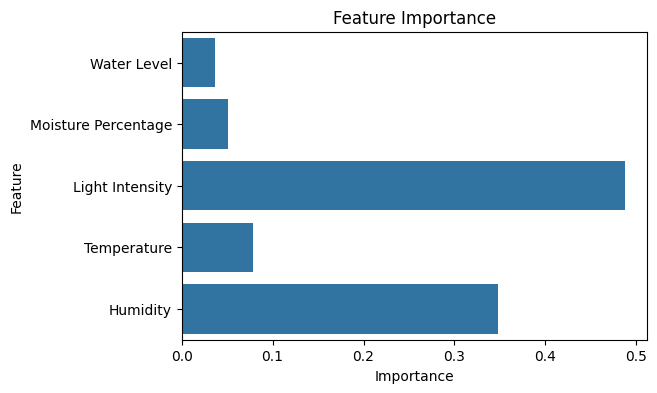

In [ ]:
# Decision Tree (IG) using dataset from K-means:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Load your dataset
# Assuming your dataset is stored in a CSV file named 'paddy_field_data.csv'
data = pd.read_csv('/content/drive/MyDrive/Research Intern/paddy-field_augmented_synthetic_shuffled_data_clustered.csv')

# Separate features (X) and target variable (y)
X = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]
y = data['Cluster']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier with Information Gain (entropy) as the criterion
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also visualize the Decision Tree if you want
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
plt.show()

# Feature importance plot
plt.figure(figsize=(6, 4))
sns.barplot(x=decision_tree.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
